# Emerging Tech - Exploratory Data Analysis

In [1]:
%matplotlib inline

In [24]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib as matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.style as style

In [43]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4), 'figure.dpi':200})
matplotlib.rcParams['figure.dpi'] = 200
 #sets the size of the charts
style.use('ggplot')
colorname = []
colorid=[]
for name, hex in matplotlib.colors.cnames.items():
    colorname.append(name)
    colorid.append(hex)
mycolors = sorted(list(zip(colorname, colorid)), key=lambda x: x[1])

In [34]:
[f.name for f in matplotlib.font_manager.fontManager.afmlist]

['Utopia',
 'Helvetica',
 'Utopia',
 'Courier',
 'Courier',
 'ITC Avant Garde Gothic',
 'Helvetica',
 'ZapfDingbats',
 'Computer Modern',
 'Palatino',
 'Utopia',
 'Palatino',
 'Times',
 'Helvetica',
 'Courier',
 'Courier',
 'Helvetica',
 'Utopia',
 'Palatino',
 'Helvetica',
 'Courier',
 'ITC Bookman',
 'Times',
 'Times',
 'New Century Schoolbook',
 'Helvetica',
 'Courier',
 'Courier',
 'Computer Modern',
 'Symbol',
 'Helvetica',
 'Helvetica',
 'Times',
 'Helvetica',
 'Palatino',
 'Helvetica',
 'Computer Modern',
 'ITC Zapf Chancery',
 'Times',
 'ITC Zapf Dingbats',
 'Times',
 'Helvetica',
 'New Century Schoolbook',
 'ITC Bookman',
 'ITC Bookman',
 'Helvetica',
 'ITC Bookman',
 'Computer Modern',
 'Helvetica',
 'ITC Avant Garde Gothic',
 'Courier',
 'New Century Schoolbook',
 'Helvetica',
 'ITC Avant Garde Gothic',
 'New Century Schoolbook',
 'Symbol',
 'Times',
 'Computer Modern',
 'ITC Avant Garde Gothic',
 'Times',
 'Courier',
 'Courier 10 Pitch',
 'Utopia',
 'Luxi Mono',
 'Courier',

### Import CSV data

In [6]:
tweets = pd.read_csv\
("../data/twitter.csv", encoding='latin-1', sep=';',header=0,\
 names=['StringDate', 'Days', 'From', 'Tweet'])\
.filter(items=['Days', 'From', 'Tweet'])
tweets.head()

,Days,From,Tweet
0,1458,@NautilusMag,The Frankfurt airport forms a special kind of ...
1,1456,@NautilusMag,"In our new chapter, we look at things that pus..."
2,1455,@NautilusMag,"We don't play favorites with our readers, but ..."
3,1455,@NautilusMag,"There can be no science without fancy, no art..."
4,1455,@NautilusMag,The life and work of the novelist Vladimir Nab...


In [8]:
tweets['From']=tweets['From'].str.lower()

In [9]:
tweets = tweets[tweets['From']!='@mashable']
len(tweets)

518145

### Fix Date

In [10]:
def days_to_date(srl_no):
    days = int(srl_no-1)
    #csv initial day is 1st jan 2010
    new_date = datetime.datetime(2010,1,1,0,0) + datetime.timedelta(days)
    return new_date

In [11]:
tweets['Days'] = tweets['Days'].apply(days_to_date)

/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
tweets.columns=['Date', 'From', 'Tweet']

In [13]:
tweets.tail()

,Date,From,Tweet
645976,2019-04-02,@darpa,One surprising branch of research applies mach...
645977,2019-04-02,@darpa,Check out BTO's research portfolio at https://...
645978,2019-04-02,@darpa,Our Biological Technologies Office turned 5 ye...
645979,2019-04-01,@darpa,What's old is new! With increasing risks to di...
645980,2019-04-01,@darpa,Machine learning for human language technology...


### Tweets by Source

In [18]:
sorted(tweets['From'].unique()), len(tweets['From'].unique())

(['@bbctech',
  '@darpa',
  '@engadget',
  '@forbestech',
  '@fttechnews',
  '@futureshift',
  '@guardiantech',
  '@huffposttech',
  '@nautilusmag',
  '@reuterstech',
  '@sai',
  '@techcrunch',
  '@technology',
  '@techreview',
  '@thefuturist007',
  '@verge',
  '@wired',
  '@wireduk'],
 18)

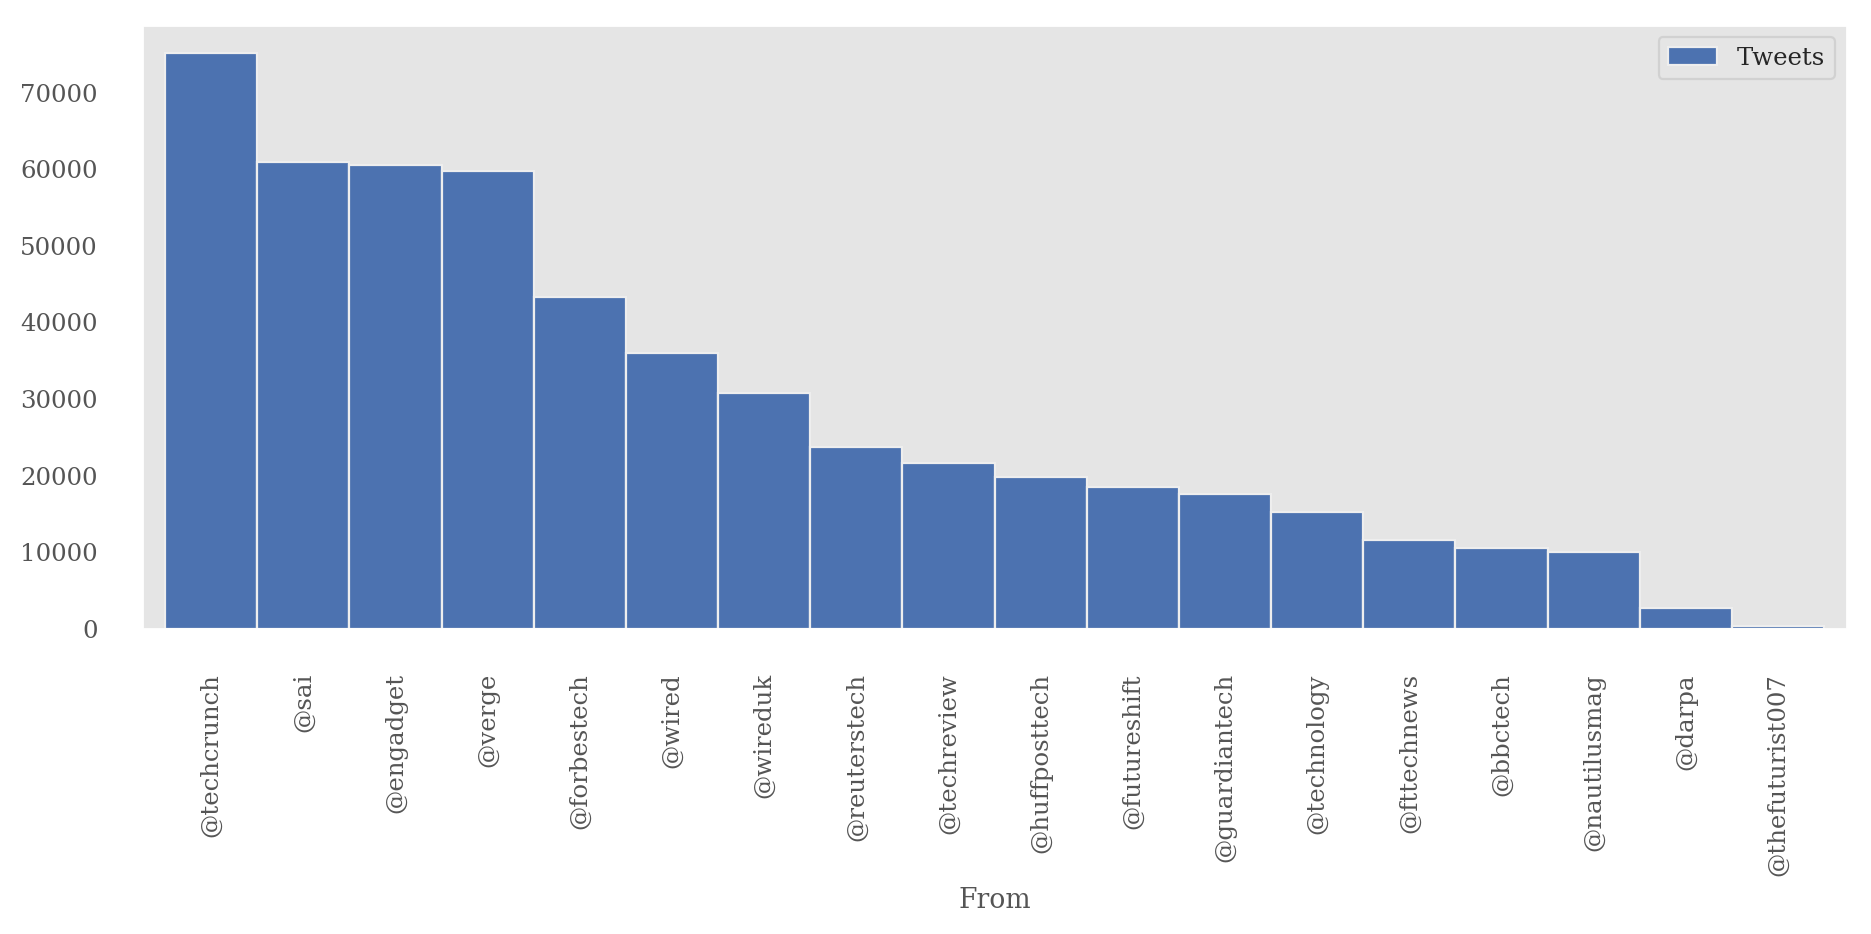

In [46]:
style.use('seaborn-deep')
matplotlib.rcParams['font.family'] = 'serif'
# sns.set(rc={'figure.figsize':(11, 4), 'figure.dpi':200})
sns.set_context('paper')
chart = tweets.groupby(['From']).count().filter(items=['Tweet'])
chart.columns=['Tweets']
chart.sort_values(['Tweets'], ascending=False).plot(kind='bar', grid=False, width=1)# ,logy=True

In [12]:
tweets = tweets[tweets['From']!='@mashable']


### Tweets by Date

In [47]:
#From fastai date feature engineering
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [48]:
add_datepart(tweets, 'Date', False)

/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/Cellar/ipython/7.3.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [49]:
tweets = tweets.reset_index()

In [81]:
tweets = tweets.set_index('Date').sort_index()

KeyError: 'Date'

In [82]:
tweets.head()

,index,From,Tweet,Year,Month,Week,Day,Dayofweek,Dayofyear,Elapsed
Date,,,,,,,,,,
2010-01-01,65285,@sai,Top 10 Objectively Biggest Tech Stories Of 200...,2010,1,53,1,4,1,1262304000
2010-01-01,195166,@guardiantech,Silicon Valley campaign seeks startup visa for...,2010,1,53,1,4,1,1262304000
2010-01-01,502284,@techcrunch,2010: My Fifth Annual List Of The Tech Product...,2010,1,53,1,4,1,1262304000
2010-01-01,502285,@techcrunch,Namebench: Google's 20% Project To Find The Fa...,2010,1,53,1,4,1,1262304000
2010-01-01,502286,@techcrunch,Six New Years Resolutions For Apple And The iP...,2010,1,53,1,4,1,1262304000


In [94]:
chart = tweets.resample('D', closed='left', label='right').count().filter(items=['Tweet'])
chart.columns=['Tweets']

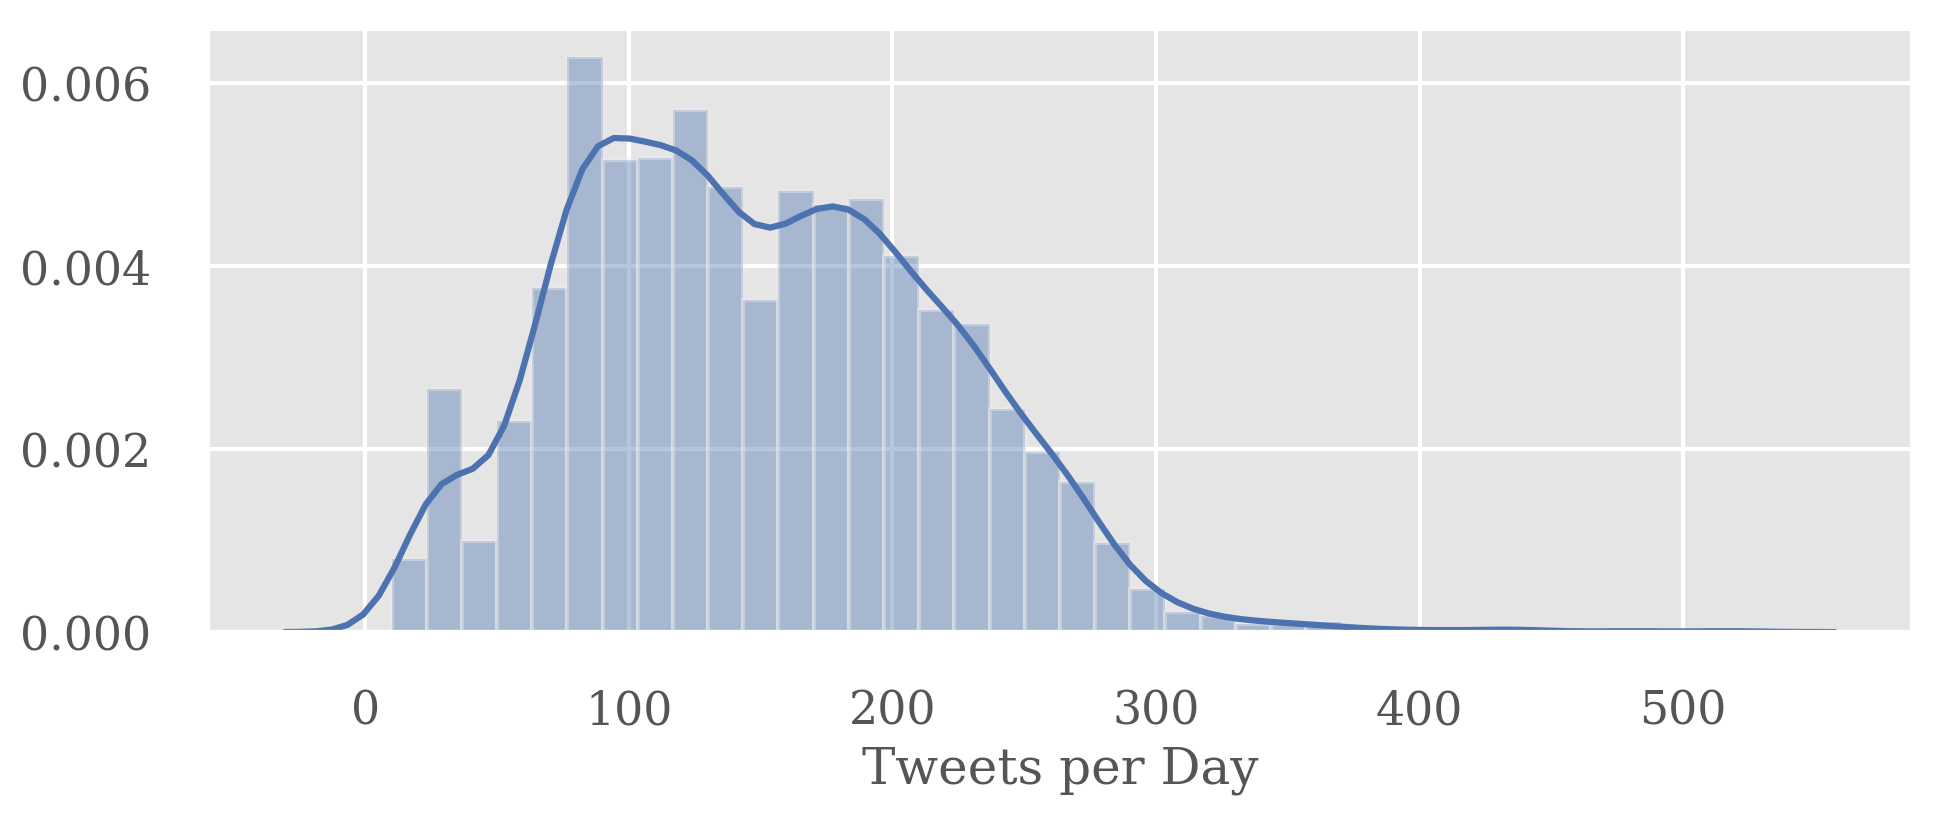

In [95]:
sns.distplot(chart['Tweets'], axlabel='Tweets per Day')
sns.set_context("poster")

In [138]:
tweets.index.rename('Mês-Semestre-Ano')
chart = tweets.resample('2QS', closed='left', label='right').count().filter(items=['Tweet'])
# .plot(marker='o',linewidth=1, legend=False)
# chart.set_xlabel('Semestre-Ano')

In [139]:
chart2 = tweets.resample('MS', closed='left', label='right').count().filter(items=['Tweet'])
chart3 = tweets.resample('AS', closed='left', label='right').count().filter(items=['Tweet'])

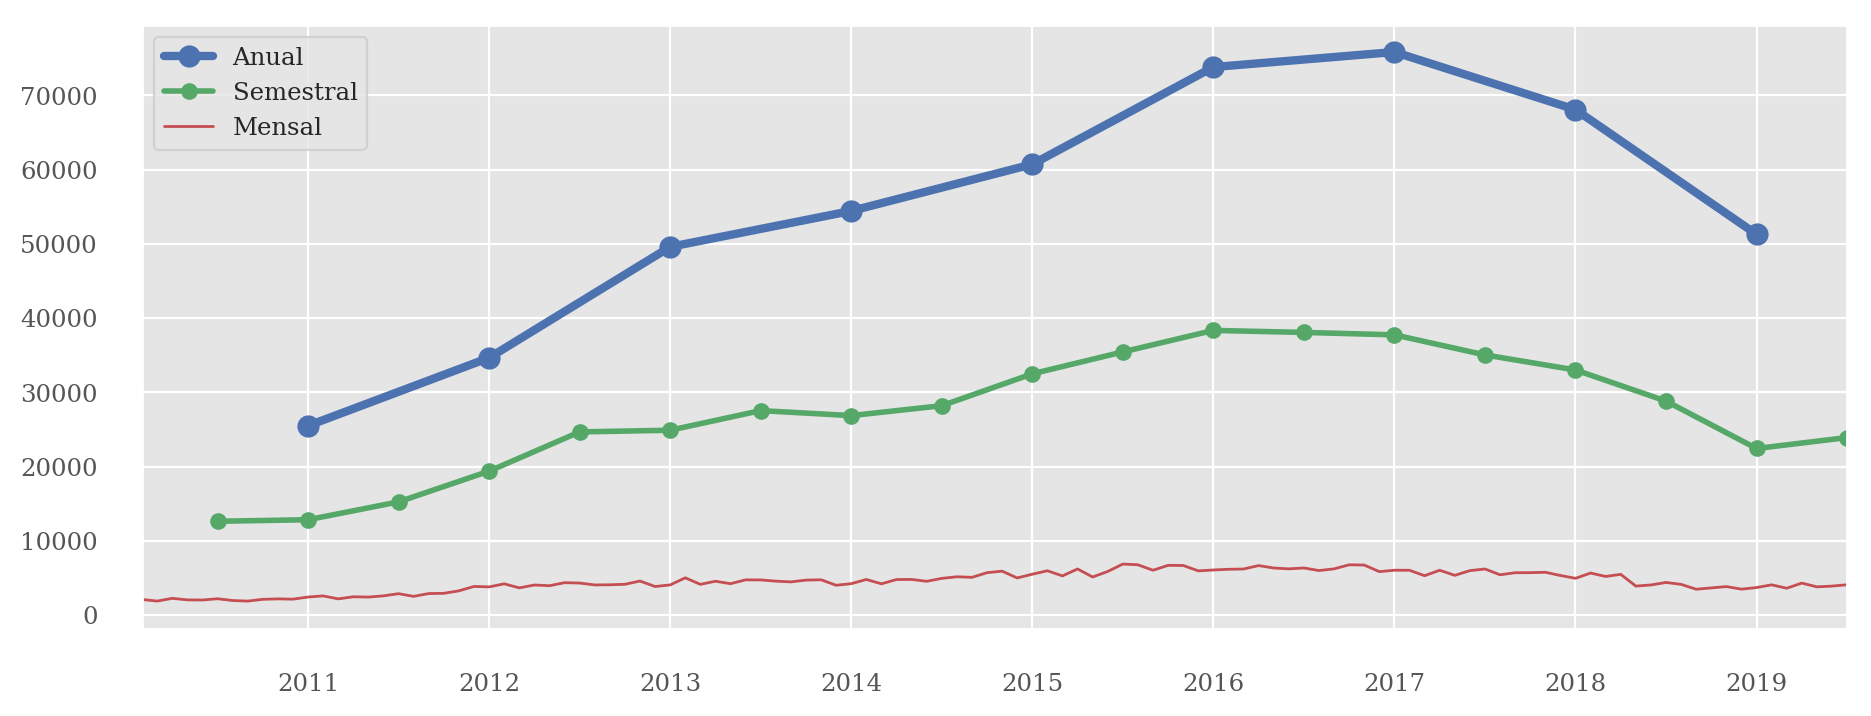

In [142]:
fig, ax = plt.subplots(1, 1)
chart3[:'2019-7-1'].plot(ax=ax,  marker='o',markersize=8, linewidth=3, legend=False, logy=True)
chart.plot(ax=ax,  marker='o',  markersize=6, linewidth=2,legend=False, logy=True)
chart2.plot(ax=ax,   linewidth=1, legend=False, logy=True)
ax.legend(["Anual", "Semestral", "Mensal"]);
sns.set_context("paper")
ax.xaxis.label.set_visible(False)

TypeError: argument of type 'AxesSubplot' is not iterable

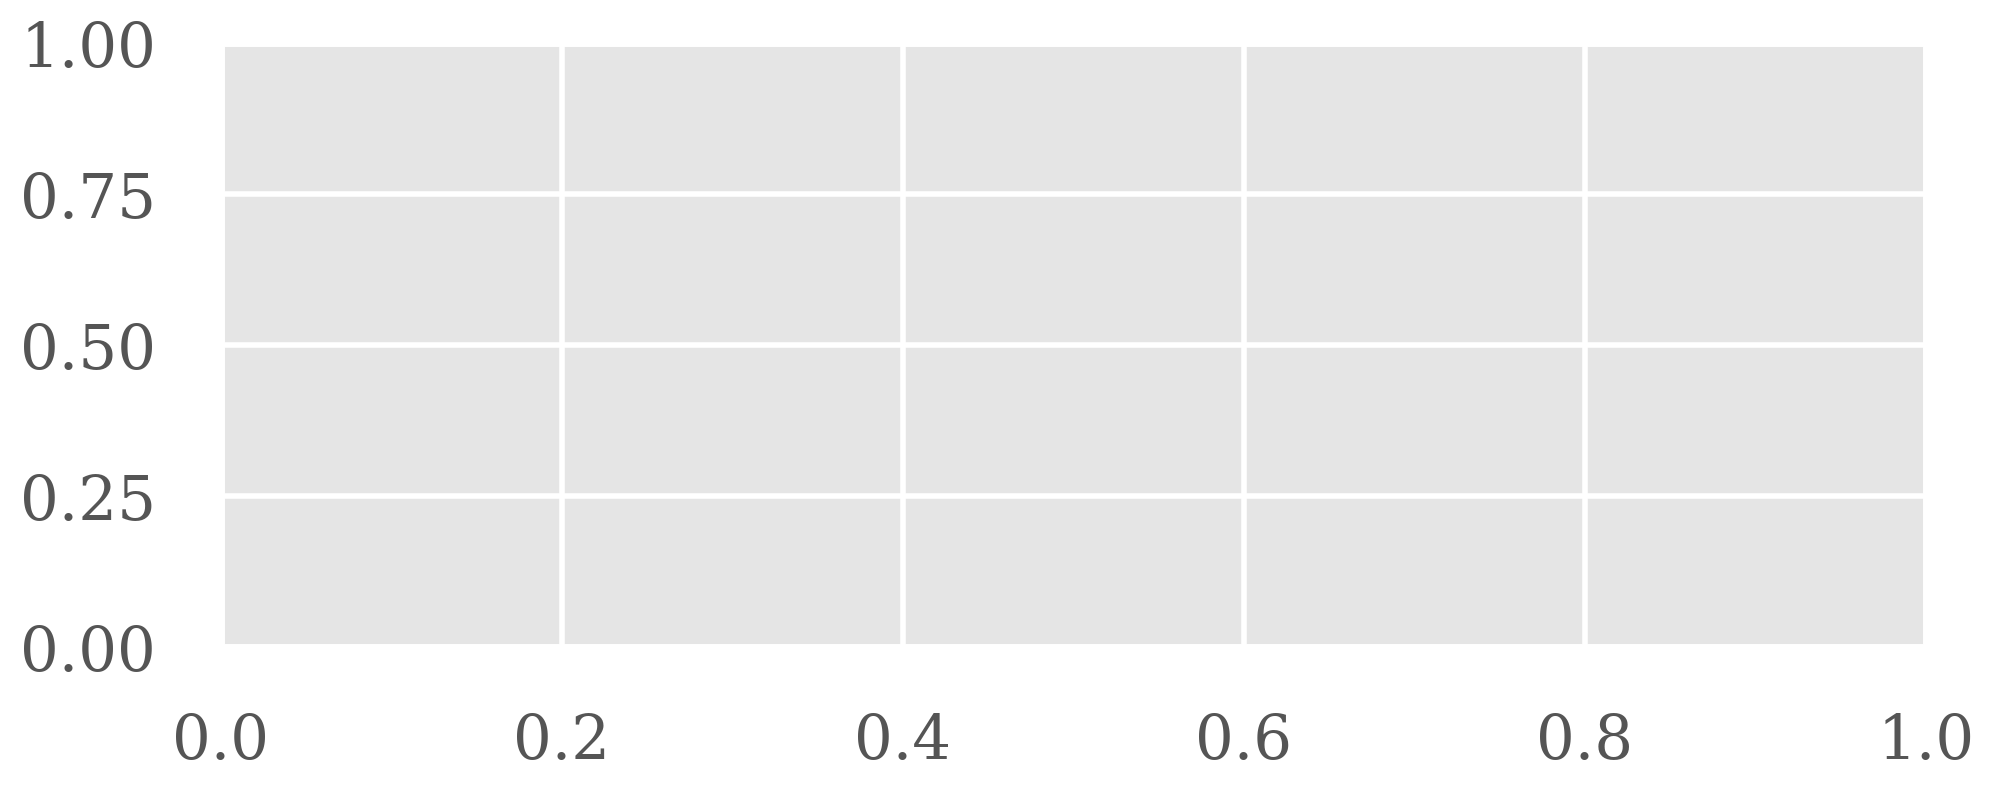

In [110]:
plt.plot( 'Date', 'Tweet', data=chart, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Date', 'Tweet', data=chart2, marker='', color='olive', linewidth=2)
plt.legend()
#121 Line chart customization


Text(0, 0.5, 'Tweets per Week')

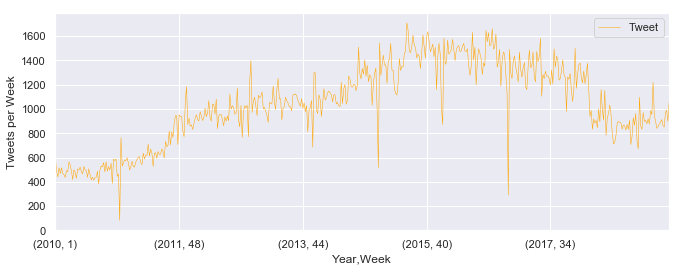

In [21]:
chart = tweets.groupby(['Year', 'Week']).count().filter(items=['Tweet']).plot(linewidth=0.5, color='orange')#marker='o', linestyle='-'
chart.set_ylabel('Tweets per Week')

# chart.xaxis.set_major_locator(ticker.MultipleLocator(52))
# chart.xaxis.set_minor_locator(ticker.MultipleLocator(26))

# chart.xaxis.set_major_locator()
# chart.xaxis.set_major_locator(mdates.MonthLocator())
# chart.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Text(0, 0.5, 'Tweets per Month')

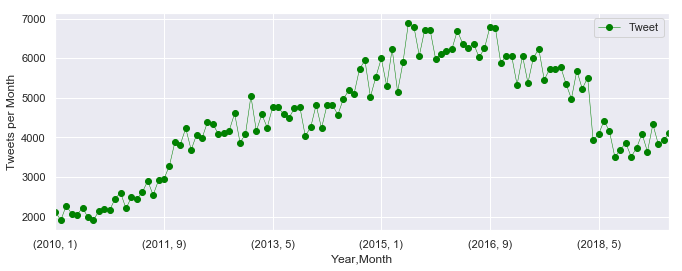

In [22]:
chart = tweets.groupby(['Year', 'Month']).count().filter(items=['Tweet']).plot(linewidth=0.5, marker='o', linestyle='-',color='green')#marker='o', linestyle='-'
chart.set_ylabel('Tweets per Month')
# chart.xaxis.set_major_locator(mdates.YearLocator())
# chart.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));